# Importing Library

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow.keras.layers as KL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 

C:\Users\Public\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Public\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Public\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.


In [2]:
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

|   0  GeForce GT 730     WDDM  | 00000000:01:00.0 N/A |                  N/A |


# Data Exploration

In [3]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'dataset/train'
test_path = 'dataset/test'

# Image Scaling & Processing

In [4]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


# Deep Learning Model

# VGG16

In [6]:
from tensorflow.keras.models import Model
inc=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
x31 = Flatten()(inc.output)
predictionss = Dense(4, activation='softmax')(x31)

In [8]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=5, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
161/161 [==============================] - 2689s 17s/step - loss: 1.3009 - accuracy: 0.4714 - val_loss: 1.0514 - val_accuracy: 0.3503
Epoch 2/5
161/161 [==============================] - 2524s 16s/step - loss: 1.0485 - accuracy: 0.4858 - val_loss: 1.0413 - val_accuracy: 0.5004
Epoch 3/5
161/161 [==============================] - 2526s 16s/step - loss: 1.0513 - accuracy: 0.4892 - val_loss: 1.0348 - val_accuracy: 0.5004
Epoch 4/5
161/161 [==============================] - 2520s 16s/step - loss: 1.0391 - accuracy: 0.4999 - val_loss: 1.0289 - val_accuracy: 0.5004
Epoch 5/5
161/161 [==============================] - 2526s 16s/step - loss: 1.0480 - accuracy: 0.4907 - val_loss: 1.0421 - val_accuracy: 0.5004


In [10]:
modelss.save('model.h5')

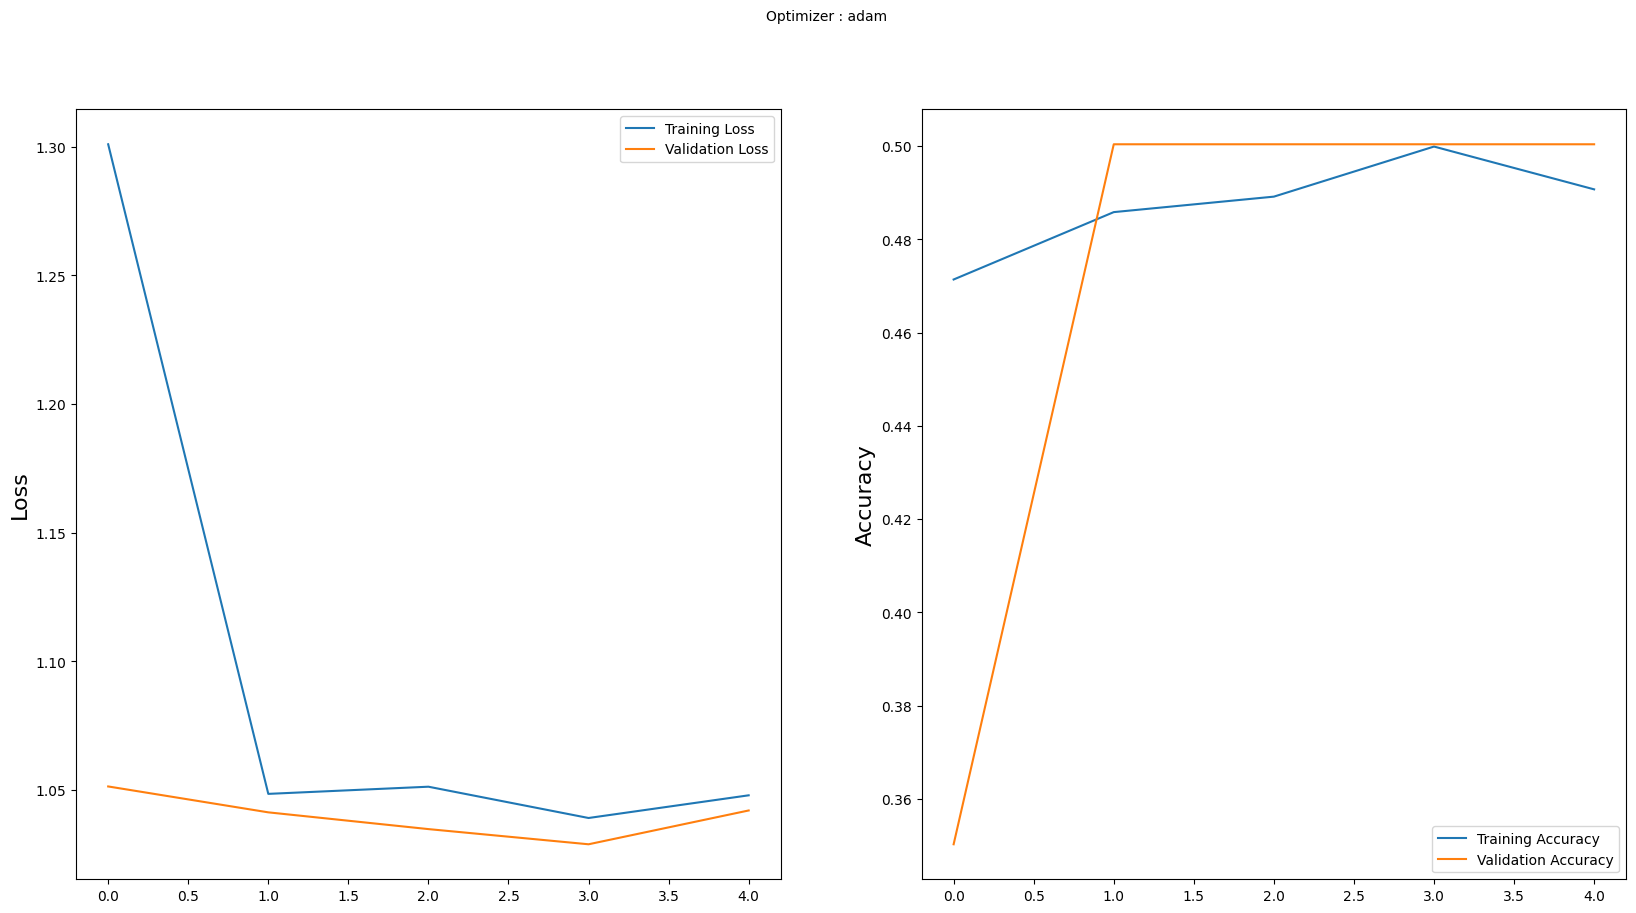

In [11]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# CNN

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(224,224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = model.fit_generator(train_set, validation_data=test_set, epochs=50)
x=r2

Epoch 1/50
161/161 [==============================] - 283s 2s/step - loss: 1.0330 - accuracy: 0.5017 - val_loss: 11.3755 - val_accuracy: 0.5199
Epoch 2/50
161/161 [==============================] - 306s 2s/step - loss: 0.9865 - accuracy: 0.5149 - val_loss: 0.9500 - val_accuracy: 0.5004
Epoch 3/50
161/161 [==============================] - 301s 2s/step - loss: 1.0086 - accuracy: 0.4874 - val_loss: 2.5580 - val_accuracy: 0.5324
Epoch 4/50
161/161 [==============================] - 305s 2s/step - loss: 0.9626 - accuracy: 0.5103 - val_loss: 1.0164 - val_accuracy: 0.5332
Epoch 5/50
161/161 [==============================] - 293s 2s/step - loss: 0.9580 - accuracy: 0.5300 - val_loss: 1.0854 - val_accuracy: 0.3550
Epoch 6/50
161/161 [==============================] - 304s 2s/step - loss: 0.9562 - accuracy: 0.5399 - val_loss: 0.9514 - val_accuracy: 0.5684
Epoch 7/50
161/161 [==============================] - 298s 2s/step - loss: 0.9321 - accuracy: 0.5540 - val_loss: 0.9596 - val_accuracy: 0.552

In [24]:
model.save('model2.h5')

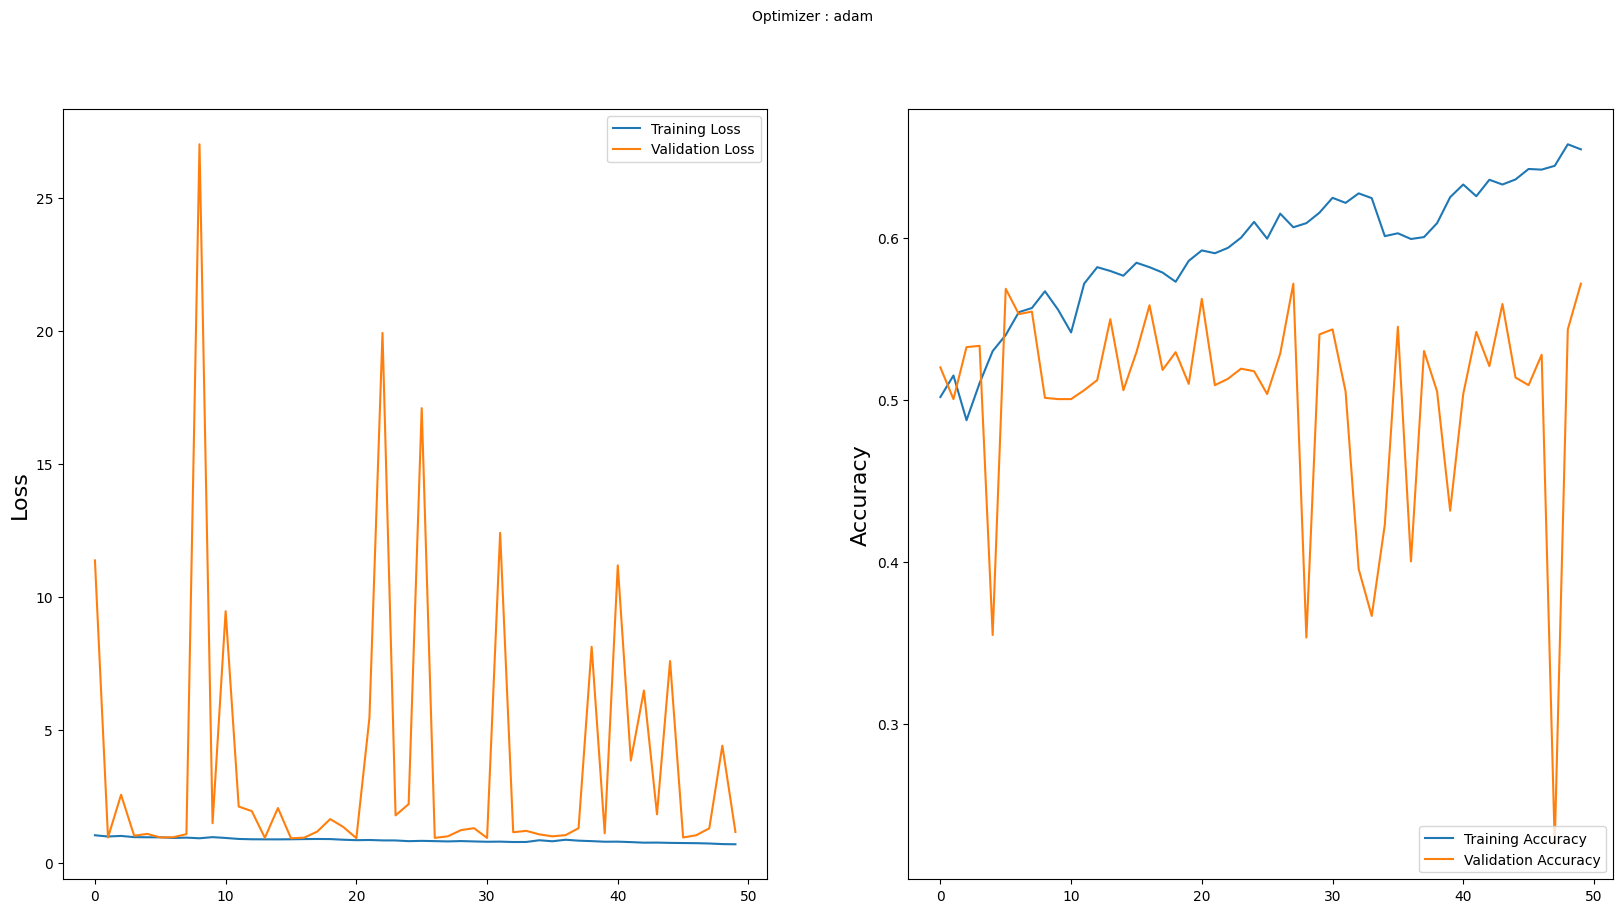

In [25]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# RNN

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 384)      

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_acc")

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set, validation_data=test_set, epochs=10, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 263s 2s/step - loss: 3.1627 - accuracy: 0.4724 - val_loss: 1.2982 - val_accuracy: 0.1790
Epoch 2/10
161/161 [==============================] - 263s 2s/step - loss: 1.0400 - accuracy: 0.4880 - val_loss: 1.4618 - val_accuracy: 0.5082
Epoch 3/10
161/161 [==============================] - 263s 2s/step - loss: 1.0054 - accuracy: 0.5054 - val_loss: 1.4816 - val_accuracy: 0.5051
Epoch 4/10
161/161 [==============================] - 263s 2s/step - loss: 0.9772 - accuracy: 0.5181 - val_loss: 2.1151 - val_accuracy: 0.5012
Epoch 5/10
161/161 [==============================] - 263s 2s/step - loss: 0.9844 - accuracy: 0.5108 - val_loss: 4.5858 - val_accuracy: 0.5004
Epoch 6/10
161/161 [==============================] - 263s 2s/step - loss: 0.9750 - accuracy: 0.5114 - val_loss: 1.0726 - val_accuracy: 0.5473
Epoch 7/10
161/161 [==============================] - 264s 2s/step - loss: 0.9721 - accuracy: 0.5249 - val_loss: 1.1552 - val_accuracy: 0.5215

In [21]:
model.save('model3.h5')

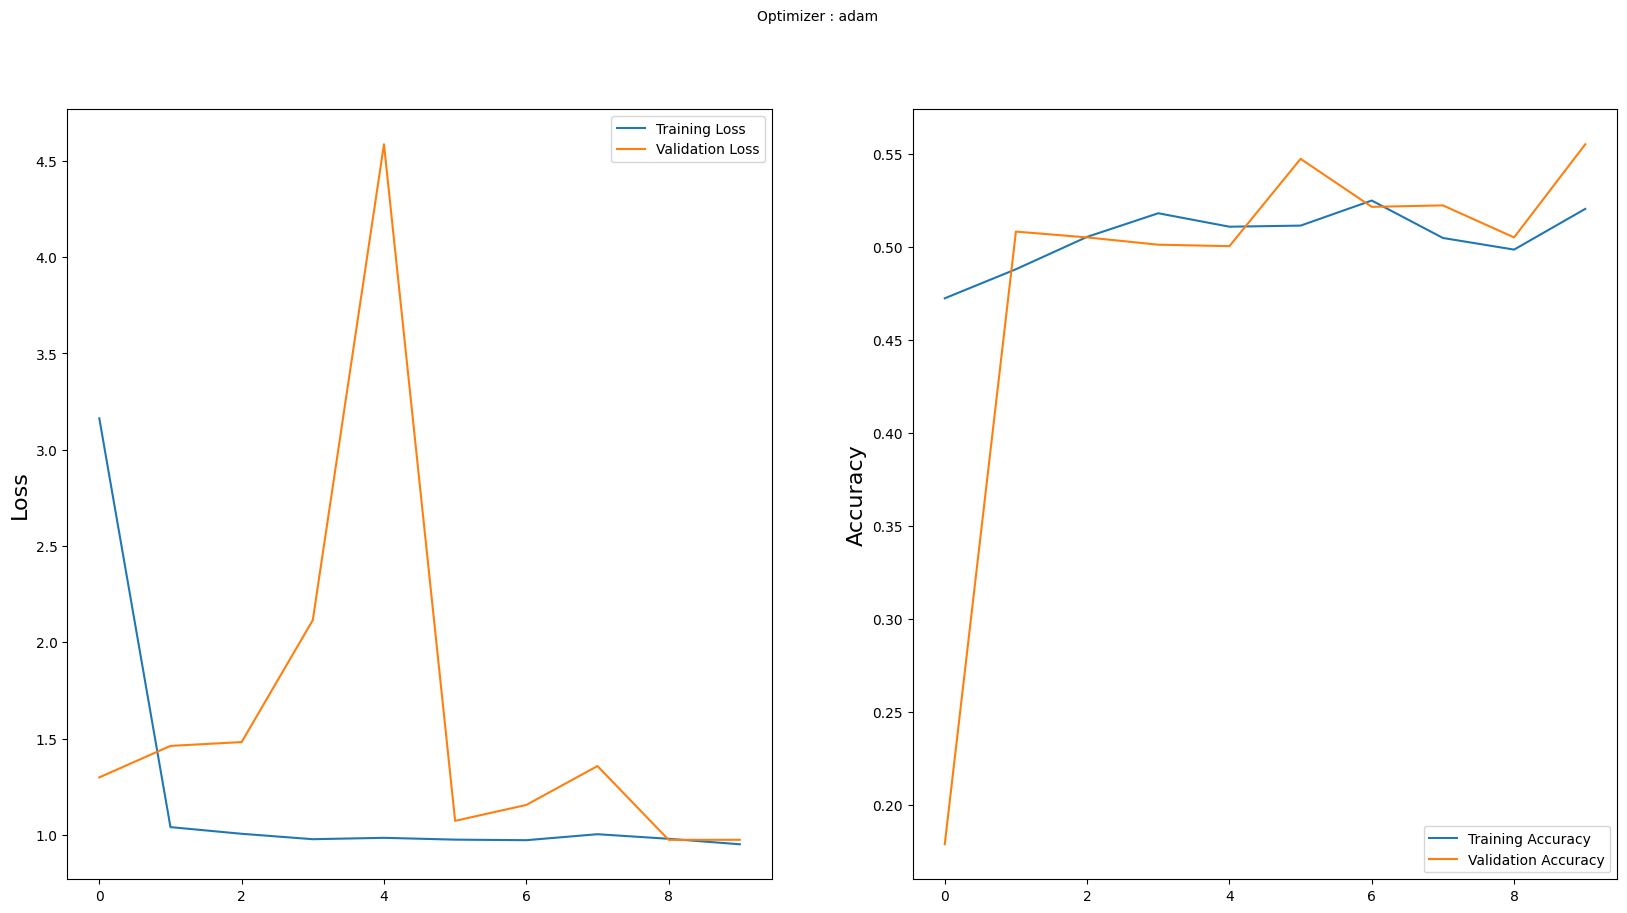

In [22]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()